In [1]:
import numpy as np
import pandas as pd
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [31]:
ext_df = pd.read_excel('../data/Sea_Ice_Index_Monthly_Data_by_Year_G02135_v3.0 (1).xlsx',sheet_name='SH-Extent')

ext_df = ext_df[np.isin(ext_df['Unnamed: 0'], np.arange(1980,2022))]

ext_df

,Unnamed: 0,January,February,March,April,May,June,July,August,September,October,November,December,Unnamed: 13,Annual
2,1980,4.562,2.818,3.295,5.405,8.857,12.490,15.564,17.805,18.817,18.568,16.133,10.156,NaN,11.230
3,1981,4.412,2.873,3.392,5.838,9.355,13.109,16.039,17.737,18.597,18.294,16.111,10.895,NaN,11.435
4,1982,5.260,3.129,4.288,7.723,10.758,13.417,15.872,17.789,18.353,17.789,15.537,9.216,NaN,11.640
5,1983,4.770,3.070,4.016,6.470,9.526,12.643,15.467,17.251,18.585,17.915,16.014,10.394,NaN,11.389
6,1984,4.779,2.677,3.612,6.422,9.748,13.231,16.395,17.928,18.171,17.573,16.134,10.473,NaN,11.454
7,1985,4.455,2.836,3.717,6.493,10.153,13.428,15.721,17.632,18.703,18.204,16.140,11.352,NaN,11.618
8,1986,5.422,3.193,3.698,6.386,9.296,12.687,15.317,16.999,17.683,17.184,15.007,9.654,NaN,11.088
9,1987,5.126,3.254,4.113,6.797,9.694,12.684,15.752,17.598,18.246,17.674,15.584,NaN,NaN,11.554
10,1988,NaN,2.886,3.966,6.288,9.602,13.093,15.749,17.561,18.307,18.361,16.148,11.061,NaN,12.131
11,1989,4.737,2.978,3.927,6.306,10.297,13.580,15.711,17.466,18.121,17.856,15.734,9.838,NaN,11.426


In [33]:
sam_df = pd.read_csv('../data/climate_indexes/SAM.csv',delim_whitespace=True)

sam_df = sam_df[np.isin(sam_df['YEAR'], np.arange(1980,2022))]

sam_df

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
23,1980,0.01,-1.75,-2.58,-1.77,-0.51,3.19,-1.68,-1.68,-2.56,0.45,-2.09,-0.10
24,1981,0.84,1.76,-2.47,-3.52,0.88,0.38,-1.43,-1.99,-1.49,-0.39,2.34,2.21
25,1982,-0.77,0.70,4.28,2.89,-0.70,2.40,0.01,1.00,1.56,-2.14,-2.32,-2.21
26,1983,-2.44,0.89,-0.71,-0.60,-0.68,0.38,1.63,0.09,-0.72,2.05,3.79,1.52
27,1984,-1.96,-1.74,-0.38,-0.23,-0.33,1.08,-0.21,-2.33,-0.16,1.06,0.34,-3.22
28,1985,-2.38,-0.02,-0.08,0.95,0.38,-2.49,2.64,1.26,1.07,0.57,2.28,1.90
29,1986,0.37,-4.89,-1.26,-0.57,-2.19,-0.95,-0.02,1.68,2.72,-0.38,0.50,1.31
30,1987,-2.51,-2.49,-1.11,-0.17,-0.34,0.18,-0.26,1.79,-0.72,0.78,1.77,0.30
31,1988,0.13,0.12,-2.01,2.11,-2.03,-3.06,0.64,-2.00,-2.70,-6.03,1.77,1.88
32,1989,-0.02,1.14,0.20,0.00,3.73,2.91,0.88,-1.21,-0.23,-0.16,0.69,-0.05


LinregressResult(slope=nan, intercept=nan, rvalue=nan, pvalue=nan, stderr=nan, intercept_stderr=nan)
January nan nan
LinregressResult(slope=0.004792399176291885, intercept=3.051383150760413, rvalue=0.02271800752675257, pvalue=0.8864444662211887, stderr=0.033345762277989875, intercept_stderr=0.06568434031949541)
February 0.004792399176291885 3.051383150760413
LinregressResult(slope=0.10327667504032491, intercept=4.011264449948309, rvalue=0.3105301380678815, pvalue=0.045336691035021644, stderr=0.0499861450833696, intercept_stderr=0.08219238317719041)
March 0.10327667504032491 4.011264449948309
LinregressResult(slope=0.10584987994793119, intercept=6.775050987625613, rvalue=0.24685197118556493, pvalue=0.11502484596830492, stderr=0.06570091147011263, intercept_stderr=0.11170084293896758)
April 0.10584987994793119 6.775050987625613
LinregressResult(slope=0.06986692961250156, intercept=10.126794674814894, rvalue=0.16257844379953817, pvalue=0.3036226735479462, stderr=0.06704430625895884, inter

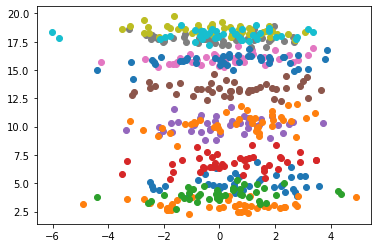

In [38]:
months = ['January','February','March','April','May','June','July','August','September','October','November','December']

for month in months:
    
    extents = ext_df[month]
    sams = sam_df[month[:3].upper()]
    
    plt.scatter(sams,extents)
    
    reg = linregress(sams,extents)
    
    print(reg)
    
    print(month,reg[0],reg[1])